In [1]:
#import the libra
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#reading dataset
df=pd.read_csv('50_startups.csv' )
df.head(5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
#iloc to slice frame into indices x and y
X= df.iloc[:,:-1]
#include all rows all columns upto -1 excluding -1 For independent Variable X
Y=df.iloc[:,-1].values
#include only last columns for dependent Variable Y


In [3]:
#here there is cateogorical valyes STATE
#so we convert cateogorical values to numerical values using SKlearn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [4]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [5]:
#splitting data into Train and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2)
#20 percent data test set and 80 percent for  training set

In [7]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [13]:
#predict the profit values of test set using tain model regresiion

Y_pred = reg.predict(X_test)

df =pd.DataFrame({'Real Values': Y_test,'Predicted Values':Y_pred})
df

,Real Values,Predicted Values
0,144259.40,136309.362260
1,141585.52,126090.585979
2,96778.92,95366.546918
3,107404.34,103975.792609
4,156122.51,158769.227554
5,97483.56,98553.333483
6,90708.19,73345.654841
7,14681.40,50944.642005
8,156991.12,162696.210665
9,146121.95,132238.881773


#### We now have two data sets Y_test which are the real values and Y_pred which arethe values that we predicted.we compare both value to see how our model perfomed how good is the accuracy
### so now we measure the accuracy

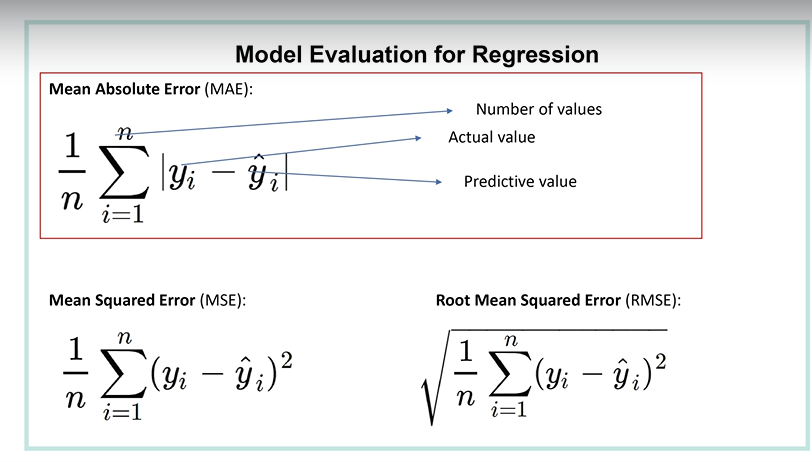


In [17]:
#Root mean squared error(RMSE)
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

14720.609142428788
